In [1]:
import h5py
import pandas as pd
import h5py
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os 
import healpy as hp
import seaborn as sns
sns.set()
sns.set_style("darkgrid", {'grid.linestyle': '--', 'font.serif':'Times New Roman'})
sns.set_context("poster", 1.5, {"lines.linewidth": 2.0})

def rpm_to_period(rpm):
    return 60.0 / rpm

def get_data(path):
    with h5py.File(path, 'r') as f:
        ss_group = f["ss"]
        ss_data = {}
        for key in ss_group.keys():
            ss_data[key] = ss_group[key][()]
        std_on_latitude = f['std_on_latitude'][:]
        mean_revisit = f['mean_revisit'][()]
        return {"ss":ss_data, "std_on_latitude":std_on_latitude, "mean_revisit":mean_revisit}

In [2]:
path = '/home/cmb/yusuket/gp/scan_optimisation/calibration/revisit/output/'
alpha = np.arange(3, 95-3, 3)
T_alpha = np.logspace(3.2, 7.2, 50)
nside = 256
npix = hp.nside2npix(nside)
T_spin = np.zeros([len(alpha), len(T_alpha)])
T_prec = np.zeros([len(alpha), len(T_alpha)])
Alpha = np.zeros([len(alpha), len(T_alpha)])
Beta = np.zeros([len(alpha), len(T_alpha)])

Num = np.zeros([len(alpha), len(T_alpha)])
ruck = []
ruck_T = []
total_mean = []
total_std = []
total_north = []
total_south = []
lim = int(4*nside/2 - 1)
direct = ["230325_phi=0", "230321", "230325_phi=180","230325_phi=270"]
direct = ["230325_phi=0", "230325_phi=90", "230325_phi=180","230325_phi=270"]
for l in range(0, 4):
    k = 1
    _path_ = path + direct[l]
    revisit_mean = np.zeros([len(alpha), len(T_alpha)])
    revisit_std = np.zeros([len(alpha), len(T_alpha)])
    revisit_north = np.zeros([len(alpha), len(T_alpha)])
    revisit_south = np.zeros([len(alpha), len(T_alpha)])
    for i in range(0, len(alpha)):
        for j in range(0, len(T_alpha)):
            p = _path_ + '/output_{}.h5'.format(k)
            if os.path.exists(p) == True:
                data = get_data(p)
                Alpha[i,j] = data["ss"]["alpha"]
                Beta[i,j] = data["ss"]["beta"]
                T_spin[i,j] = rpm_to_period(data["ss"]["spin_rpm"])
                T_prec[i,j] = rpm_to_period(data["ss"]["prec_rpm"])
                Num[i,j] = k
                revisit_mean[i,j] = data["mean_revisit"]
                #revisit_std[i,j] = np.std(data["std_on_latitude"])
                revisit_north[i,j] = np.sum(data["std_on_latitude"][:lim])/(npix/2)
                revisit_south[i,j] = np.sum(data["std_on_latitude"][lim+1:])/(npix/2)
                if np.isnan(data["mean_revisit"]) == True:
                    ruck.append(k)
                    ruck_T.append(T_prec[i,j])

                #if k == 675: #たまたまhitが0だったデータを消す
                #    p = path+'/output_{}.h5'.format(k-1)
                #    data = get_data(p)
                
            if k%100 == 0:
                print("k = ", k)
            k += 1
    total_mean.append(revisit_mean)
    total_std.append(revisit_std)
    total_north.append(revisit_north)
    total_south.append(revisit_south)
    
#print(ruck)

k =  100
k =  200
k =  300
k =  400
k =  500
k =  600
k =  700
k =  800
k =  900
k =  1000
k =  1100
k =  1200
k =  1300
k =  1400
k =  1500
k =  100
k =  200
k =  300
k =  400
k =  500
k =  600
k =  700
k =  800
k =  900
k =  1000
k =  1100
k =  1200
k =  1300
k =  1400
k =  1500
k =  100
k =  200
k =  300
k =  400
k =  500
k =  600
k =  700
k =  800
k =  900
k =  1000
k =  1100
k =  1200
k =  1300
k =  1400
k =  1500
k =  100
k =  200
k =  300
k =  400
k =  500
k =  600
k =  700
k =  800
k =  900
k =  1000
k =  1100
k =  1200
k =  1300
k =  1400
k =  1500


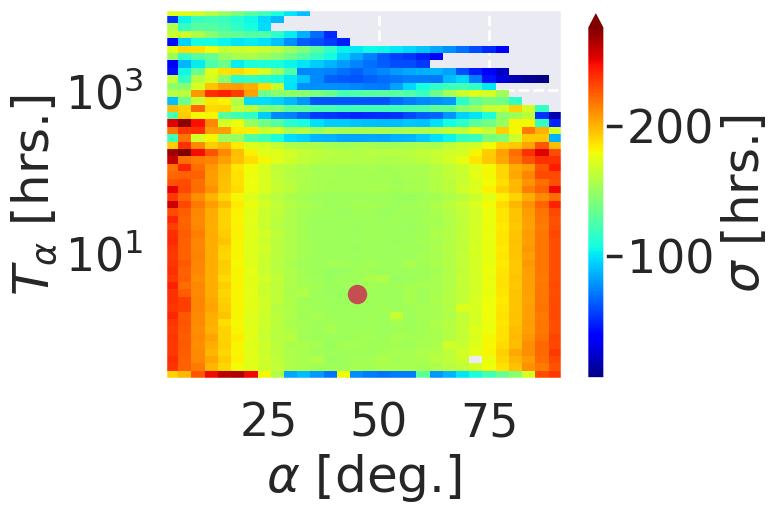

In [3]:
alpha_base = 45
prec_min_base = 192.348
fig = plt.figure()
ax = fig.add_subplot(111)
P = plt.pcolormesh(Alpha, T_prec/60/60, total_mean[1]/60/60, cmap="jet")
cbar = plt.colorbar(P, ax=ax, extend="max", label=r"$\sigma$ [hrs.]")
plt.scatter(alpha_base, prec_min_base/60, color="r")
ax.set_xlabel(r"$\alpha$ [deg.]")
ax.set_ylabel(r"$T_{\alpha}$ [hrs.]")
ax.set_yscale("log")

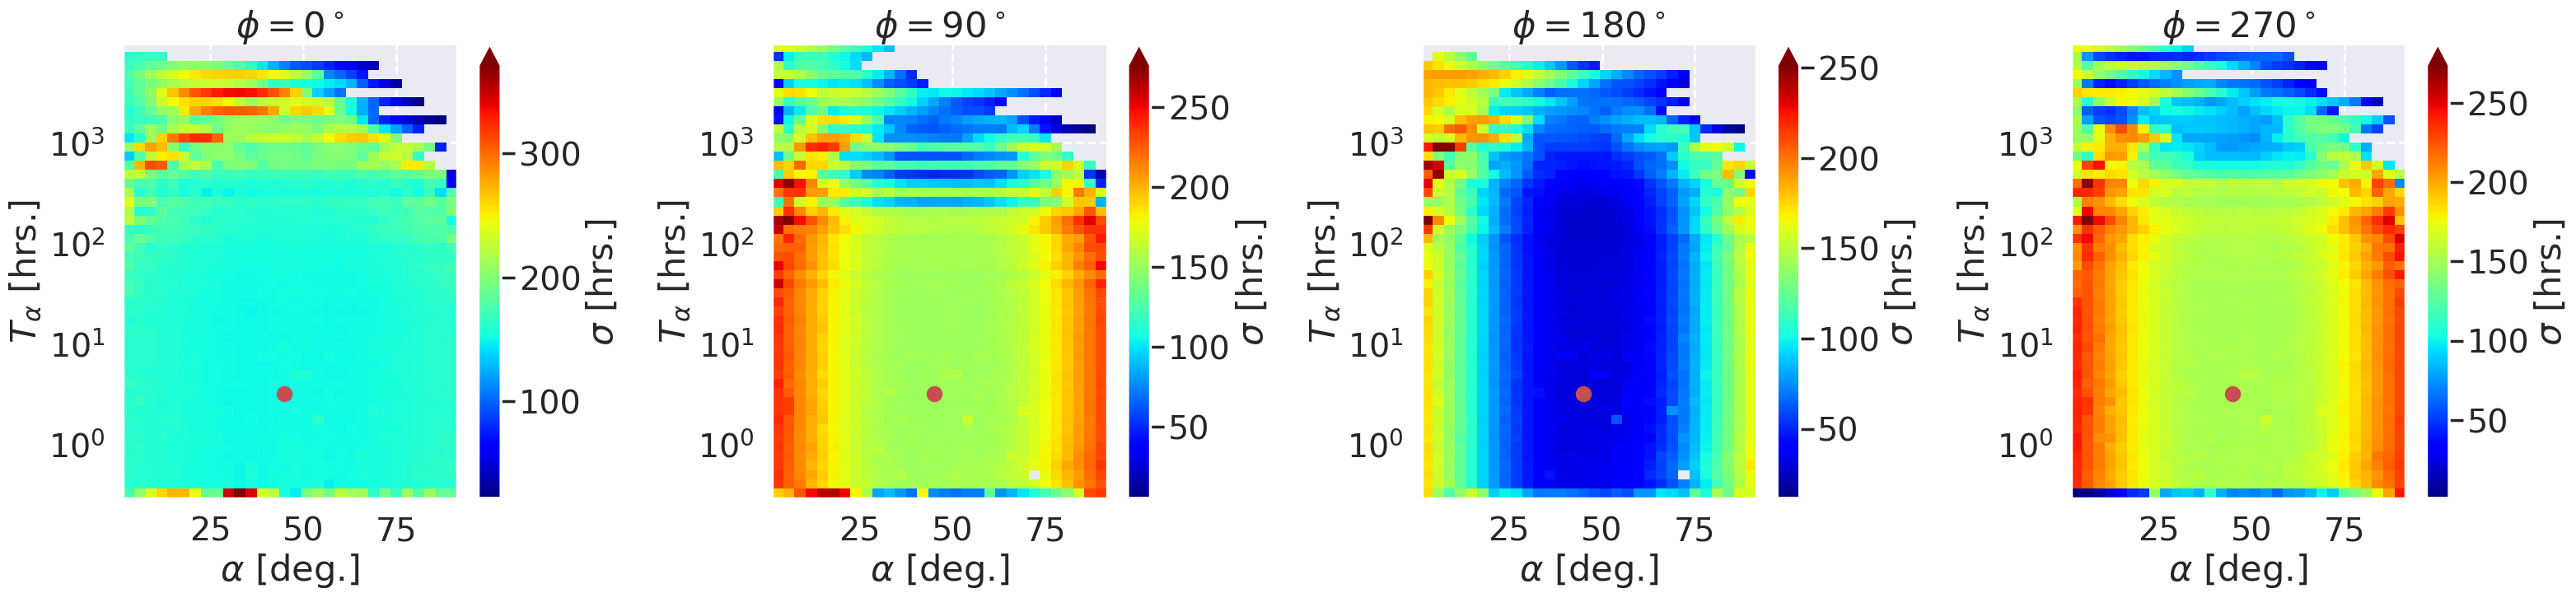

In [4]:
sns.set_context("poster", 1.3, {"lines.linewidth": 2.0})
Phi = [0,90,180,270]
fig, axs = plt.subplots(1, 4, figsize=(16*2, 4*2))
for i, ax in enumerate(axs):
    P = ax.pcolormesh(Alpha, T_prec/60/60, total_mean[i]/60/60, cmap="jet")# vmin=2e4, vmax=140000)
    cbar = plt.colorbar(P, ax=ax, extend="max", label=r"$\sigma$ [hrs.]")
    ax.scatter(alpha_base, prec_min_base/60, color="r")
    ax.set_title("$\phi={}^\circ$".format(Phi[i]))
    ax.set_xlabel(r"$\alpha$ [deg.]")
    ax.set_ylabel(r"$T_{\alpha}$ [hrs.]")
    ax.set_yscale("log")
plt.tight_layout()

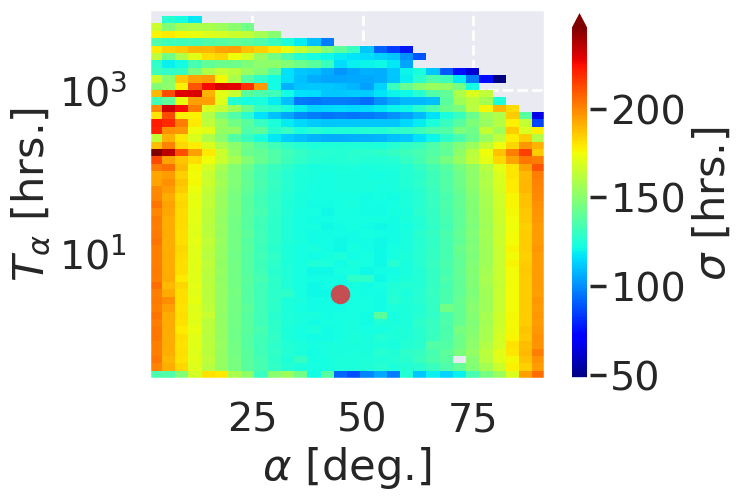

In [5]:
alpha_base = 45
prec_min_base = 192.348
fig = plt.figure()
ax = fig.add_subplot(111)
P = plt.pcolormesh(Alpha, T_prec/60/60, np.array(total_mean).mean(0)/60/60, cmap="jet")
cbar = plt.colorbar(P, ax=ax, extend="max", label=r"$\sigma$ [hrs.]")
plt.scatter(alpha_base, prec_min_base/60, color="r")
ax.set_xlabel(r"$\alpha$ [deg.]")
ax.set_ylabel(r"$T_{\alpha}$ [hrs.]")
ax.set_yscale("log")

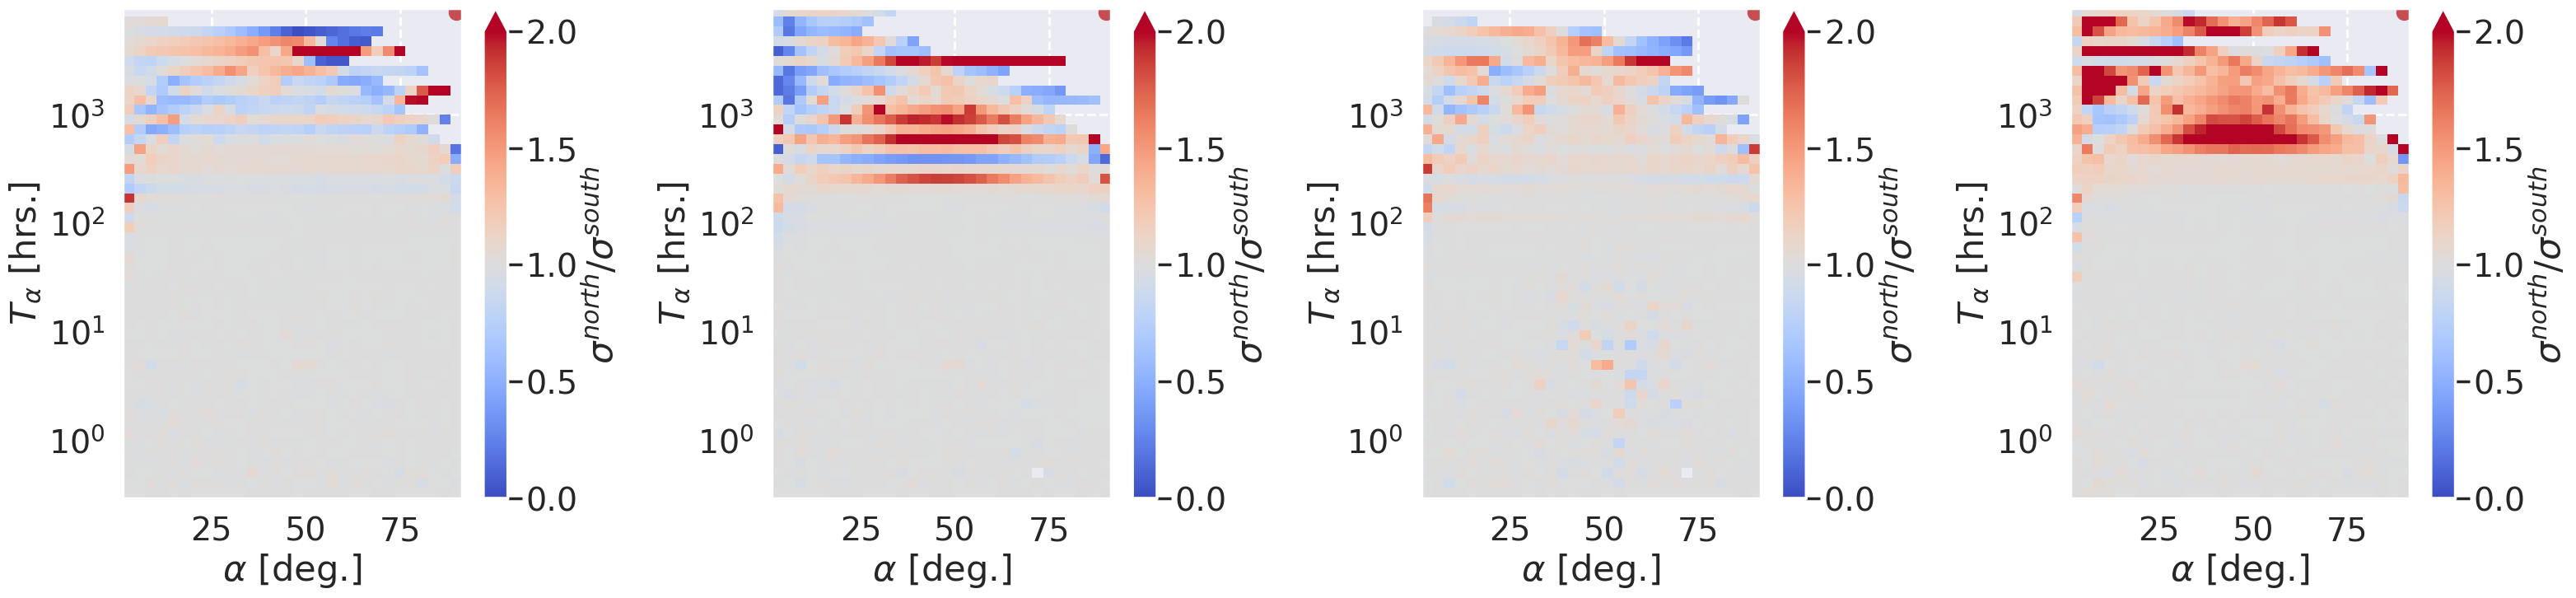

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(16*2, 4*2))
for i, ax in enumerate(axs):
    P = ax.pcolormesh(Alpha, T_prec/60/60, total_north[i]/total_south[i] , cmap="coolwarm", vmin=0,vmax=2)
    cbar = plt.colorbar(P, ax=ax, extend="max", label=r"$\sigma^{north}/\sigma^{south}$")
    ax.scatter(data["ss"]["alpha"], rpm_to_period(data["ss"]["prec_rpm"])/60/60, color="r")
    ax.set_xlabel(r"$\alpha$ [deg.]")
    ax.set_ylabel(r"$T_{\alpha}$ [hrs.]")
    ax.set_yscale("log")
plt.tight_layout()

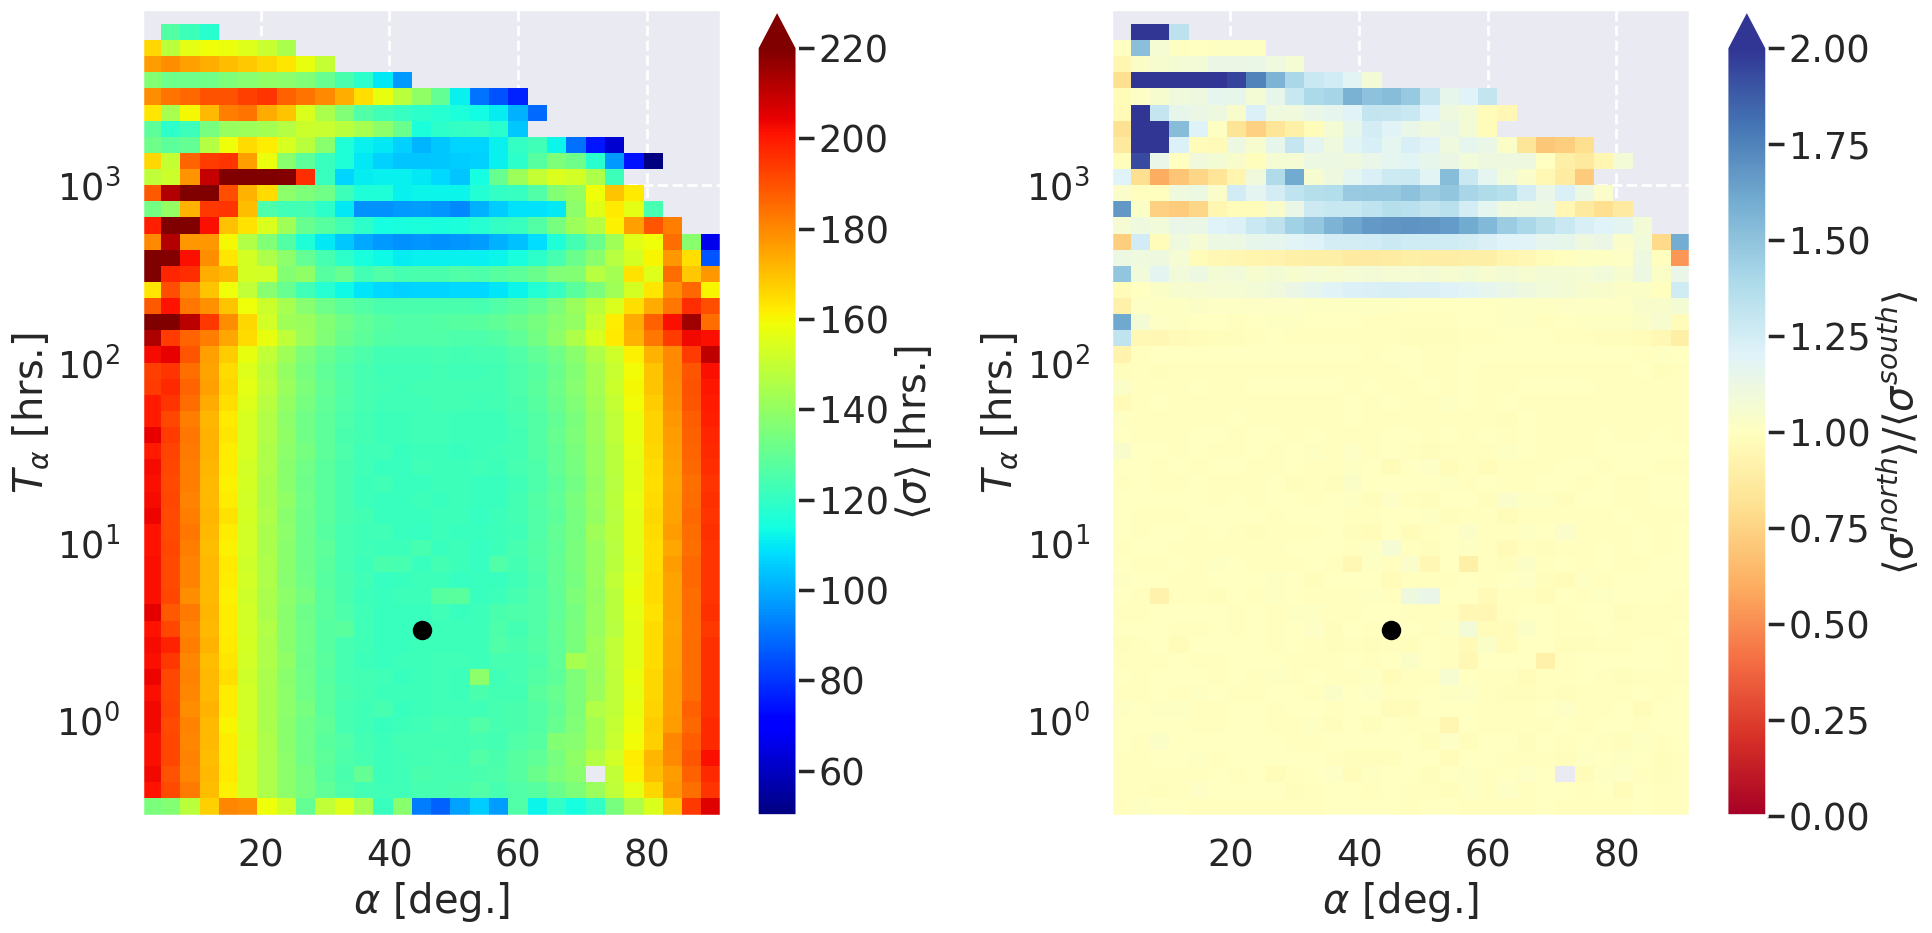

In [17]:
sns.set_context("poster", 1.2, {"lines.linewidth": 1.0})
alpha_base = 45
prec_min_base = 192.348

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10*2, 5*2))

P1 = ax1.pcolormesh(Alpha, T_prec/60/60, np.array(total_mean).mean(0)/60/60, cmap="jet", vmin=50, vmax=220)
cbar1 = plt.colorbar(P1, ax=ax1, extend="max", label=r"$\langle \sigma \rangle$ [hrs.]")
ax1.scatter(alpha_base, prec_min_base/60, color="black")
ax1.set_xlabel(r"$\alpha$ [deg.]")
ax1.set_ylabel(r"$T_{\alpha}$ [hrs.]")
ax1.set_yscale("log")

P2 = ax2.pcolormesh(Alpha, T_prec/60/60, np.mean(np.array(total_north)/np.array(total_south), 0),
                      cmap="RdYlBu", vmin=0, vmax=2)
cbar2 = plt.colorbar(P2, ax=ax2, extend="max", label=r"$\langle \sigma^{north} \rangle / \langle \sigma^{south} \rangle$")
ax2.scatter(alpha_base, prec_min_base/60, color="black")
ax2.set_xlabel(r"$\alpha$ [deg.]")
ax2.set_ylabel(r"$T_{\alpha}$ [hrs.]")
ax2.set_yscale("log")
plt.tight_layout()

plt.savefig("./revisit_time.pdf",  bbox_inches='tight')


{'FP_phi': array([0.]), 'FP_theta': array([0.]), 'alpha': 45.0, 'beta': 50.0, 'coord': b'E', 'duration': 31536000, 'hwp_rpm': 61.0, 'nside': 256, 'prec_rpm': 0.0009752622595161081, 'sampling_rate': 19.0, 'spin_rpm': 0.06472127730851064, 'start_angle': 0.0, 'start_point': b'equator'}
17.08942031134897
0.39397093996497196


Text(0.5, 0, 'Latitude [deg.]')

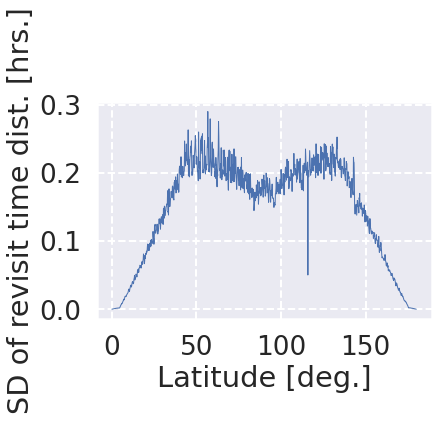

In [65]:
nside = 256
data = get_data(path + "230321/output_720.h5");
print(data["ss"])
print(rpm_to_period(data["ss"]["prec_rpm"])/60/60)
print(rpm_to_period(data["mean_revisit"]/60/60))
lat = np.linspace(0, 180, 4*nside-1)
plt.plot(lat, data["std_on_latitude"]/npix/60/60)
plt.ylabel("SD of revisit time dist. [hrs.]")
plt.xlabel("Latitude [deg.]")